# Predictive Modeling and Analysis of Online Food Delivery Services
# Author: Anuj Prabhu
# Date: 27 April 2024

## Background

- In the modern era of digital convenience, online food ordering platforms have become an integral part of many people's lives, offering a convenient way to access a wide range of culinary options. Understanding the dynamics of customer behavior and satisfaction within this domain is crucial for platform operators to enhance service quality and cater to evolving consumer preferences.
- The dataset under analysis contains comprehensive information collected from an online food ordering platform over a long period of time. It encompasses demographic attributes such as age, gender, marital status, occupation, and educational qualifications of customers, as well as location-specific details like their latitude, longitude, and pin code data. Additionally, it includes crucial feedback from customers regarding their satisfaction with the service, alongside the outcome of their orders.
- With the aim of delving into the intricate relationship between demographic/location factors and online food ordering behavior, the project embarks on an exploratory journey. Through rigorous analysis and modeling techniques, it seeks to uncover valuable insights that can guide decision-making processes and improve service quality within the online food-ordering landscape.

## Problem Statement

- The objective of this project is to **analyze the impact of demographic attributes on customer feedback regarding their orders and the resultant order output**. By examining factors such as age, gender, location, and any other relevant demographic information, we aim to discern patterns in customer satisfaction and identify potential correlations between demographics and feedback sentiment. Thus, this analysis will provide **valuable** insights for **improving customer experience** and optimizing order fulfillment processes.

In [82]:
# library imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

## Loading the Dataset

In [84]:
# Loading the Dataset
online_foods = pd.read_csv("./onlinefoods.csv")
print(online_foods.shape)

(388, 13)


- We load the "onlinefoods" dataset from our local directory and specify the parameters for loading the data into our project. To facilitate data manipulation, we convert strings to factors, leveraging the ease of handling factors. The dataset is then stored in the variable named online_foods.

## General Summary

In [86]:
# General summary
print(online_foods.head())
print()
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print()
print(online_foods.info())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

- The dataset comprises of 388 observations across 13 variables. Notably, variables such as Monthly.Income and Educational.Qualifications exhibit numerous factors that are very similar in nature. Additionally, the dataset contains a variable labeled "Unnamed: 12" for which the dataset owner has not provided clarification regarding its significance or definition. Therefore, further exploration of variable "Unnamed: 12" is warranted to ascertain its purpose and relevance within the dataset.

In [88]:
# Understand "X" variable better
print(online_foods["Unnamed: 12"].unique())

['Yes' 'No']


- Upon examination, the variable "Unnamed: 12" is observed to have values labeled as "Yes" and "No," which lack clarity and fail to provide explanatory context. In addition to an absence of information about this variable on the dataset's source website, its ambiguity renders it irrelevant for our analysis. Consequently, we proceed to the data cleaning phase of this project, where the variable "Unnamed: 12" will be removed from consideration.

## Data Cleaning and Munging

In [90]:
online_foods = online_foods.drop("Unnamed: 12", axis=1) # Removing "X" variable from online_foods because no background has been provided about this attribute and it is not self-explanatory.

- After dropping the variable "Unnamed: 12" from online_foods, we'll proceed to inspect the dataframe for any missing values.

In [92]:
# Check for NA values in dataset
has_na = online_foods.isna().any().any()
print(has_na) # No NA values in dataset

False


- After confirming the absence of NA (missing) values in the dataset, our next step involves addressing the issue of numerous similar factors by amalgamating them where appropriate.

In [94]:
# Excluding "Prefer not to say" Marital Status values from analysis (handling outlying data points)
online_foods["Marital Status"] = online_foods["Marital Status"].astype("str")
online_foods = online_foods[online_foods["Marital Status"] != "Prefer not to say"]
#online_foods["Marital Status"] = online_foods["Marital Status"].astype("category")

# Combining like factors
online_foods["Occupation"] = online_foods["Occupation"].astype("str")
online_foods.loc[online_foods["Occupation"].isin(["Employee", "Self Employeed"]), "Occupation"] = "Employed"
#online_foods["Occupation"] = online_foods["Occupation"].astype("category")

online_foods["Monthly Income"] = online_foods["Monthly Income"].astype("str")
online_foods.loc[online_foods["Monthly Income"].isin(["10001 to 25000", "25001 to 50000"]), "Monthly Income"] = "Average Monthly Income"
online_foods.loc[online_foods["Monthly Income"] == "More than 50000", "Monthly Income"] = "High Monthly Income"
online_foods.loc[online_foods["Monthly Income"].isin(["No Income", "Below Rs.10000"]), "Monthly Income"] = "Low/No Monthly Income"
#online_foods["Monthly Income"] = online_foods["Monthly Income"].astype("category")

online_foods["Educational Qualifications"] = online_foods["Educational Qualifications"].astype("str")
online_foods.loc[online_foods["Educational Qualifications"].isin(["Post Graduate", "Ph.D"]), "Educational Qualifications"] = "Higher Education"
online_foods.loc[online_foods["Educational Qualifications"].isin(["School", "Uneducated"]), "Educational Qualifications"] = "Lower/No Education"
#online_foods["Educational Qualifications"] = online_foods["Educational Qualifications"].astype("category")

online_foods["Output"] = online_foods["Output"].astype("str")
online_foods.loc[online_foods["Output"] == "No", "Output"] = "Unsuccessful"
online_foods.loc[online_foods["Output"] == "Yes", "Output"] = "Successful"
#online_foods["Output"] = online_foods["Output"].astype("category")

#online_foods["Gender"] = online_foods["Gender"].astype("category")
#online_foods["Feedback"] = online_foods["Feedback"].astype("category")

- After consolidating similar factors across multiple variables to alleviate ambiguity, we have enhanced the clarity of our data for exploratory analysis. For instance, the "Monthly.Income" variable originally encompassed values such as "Below Rs.10000", "More than 50000", and "No Income". As it can be observed, one label had a rupee symbol while others did not. These labels presented an inconsistency in the representation of income levels. To rectify this, we have transformed these labels into **three simplified categories**: **"Low/No Monthly Income", "Average Monthly Income", and "High Monthly Income"**. This streamlined data enables a clearer understanding of the relationship between a customer's monthly income and their online food ordering behavior. Similar refinement procedures have been applied to other variables, enhancing their interpretability and facilitating further analysis.

In [96]:
# Reordering factors according to customs levels
#online_foods["Marital Status"] = pd.Categorical(online_foods["Marital Status"], categories=["Single", "Married"], ordered=True)
#online_foods["Occupation"] = pd.Categorical(online_foods["Occupation"], categories=["Student", "House wife", "Employed"], ordered=True)
#online_foods["Monthly Income"] = pd.Categorical(online_foods["Monthly Income"], categories=["Low/No Monthly Income", "Average Monthly Income", "High Monthly Income"], ordered=True)
#online_foods["Educational Qualifications"] = pd.Categorical(online_foods["Educational Qualifications"], categories=["Lower/No Education", "Graduate", "Higher Education"], ordered=True)
#online_foods["Output"] = pd.Categorical(online_foods["Output"], categories=["Unsuccessful", "Successful"], ordered=True)

online_foods_reg = online_foods.copy()

online_foods_reg['Feedback'] = online_foods_reg['Feedback'].replace({'Negative ': 0, 'Positive': 1})
online_foods_reg['Output'] = online_foods_reg['Output'].replace({'Unsuccessful': 0, 'Successful': 1})
online_foods_reg['Gender'] = online_foods_reg['Gender'].replace({'Female': 0, 'Male': 1})
online_foods_reg['Marital Status'] = online_foods_reg['Marital Status'].replace({'Single': 0, 'Married': 1})
online_foods_reg['Occupation'] = online_foods_reg['Occupation'].replace({'Student': 0, 'House wife': 1, 'Employed': 2})
online_foods_reg['Monthly Income'] = online_foods_reg['Monthly Income'].replace({'Low/No Monthly Income': 0, 'Average Monthly Income': 1, 'High Monthly Income': 2})
online_foods_reg['Educational Qualifications'] = online_foods_reg['Educational Qualifications'].replace({'Lower/No Education': 0, 'Graduate': 1, 'Higher Education': 2})

- Following the consolidation of similar factors and the standardization of variable representations, we further preprocess the data by assigning different integers to each unique category in each variable. This is conducted to aid in regression analysis that follows next. With our data now cleaned and standardized, we are well-equipped to conduct exploratory analysis and derive meaningful insights from the dataset.

## Exploratory Data Analysis

- Firstly, we build Logistic Regression Models to predict the **Feedback** on orders and the **Output Status** of orders by consumers of the online food ordering app. We build Logistic Regression Models specifically because we are mainly dealing with categorical data.

### Building Logistic Regression Models

#### Feedback Model

In [98]:
# GLM for Feedback
X_feedback = online_foods_reg.drop(['Feedback'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      364
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.61
Date:                Sat, 27 Jul 2024   Deviance:                       225.23
Time:                        22:11:01   Pearson chi2:                     379.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2811
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- we model the dependent variable **Feedback** based on every other predictor present in the dataset. To model the Feedback variable, we build a logistic regression model which predicts binary outcomes. The binary outcomes are "Positive" feedback or "Negative" feedback in this case. This is also why the family parameter of the model is set to be "binomial".
- We observe that the model is **88.83%** accurate and **93.23%** precise. This is already a significant improvement from the model we trained in project 1, which was **84%** accurate and **88%** precise.
- We are going to try to improve this model. To do so, we check the p-values of each predictor and remove the predictor with the greatest p-value. As long as the p-value of a predictor is > 0.05, we keep that predictor in. We remove one bad predictor at a time / a predictor that is not contributing linearly to the model.

In [100]:
X_feedback = online_foods_reg.drop(['Feedback', 'Marital Status'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      365
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.62
Date:                Sat, 27 Jul 2024   Deviance:                       225.24
Time:                        22:11:01   Pearson chi2:                     379.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2811
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [101]:
X_feedback = online_foods_reg.drop(['Feedback', 'Marital Status', 'Age'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      366
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.63
Date:                Sat, 27 Jul 2024   Deviance:                       225.27
Time:                        22:11:01   Pearson chi2:                     378.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2811
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- The model improves a little more here as the accuracy goes from **88.2%** to **88.5%**.

In [103]:
X_feedback = online_foods_reg.drop(['Feedback', 'Marital Status', 'Age', 'Pin code'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      367
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.65
Date:                Sat, 27 Jul 2024   Deviance:                       225.30
Time:                        22:11:01   Pearson chi2:                     380.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2810
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [104]:
X_feedback = online_foods_reg.drop(['Feedback', 'Marital Status', 'Pin code', 'Age', 'Family size'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      368
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.68
Date:                Sat, 27 Jul 2024   Deviance:                       225.36
Time:                        22:11:01   Pearson chi2:                     381.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2809
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [105]:
# FINAL MODEL: FEEDBACK
X_feedback = online_foods_reg.drop(['Feedback', 'Marital Status', 'Pin code', 'Age', 'Family size', 'Educational Qualifications'], axis=1)  # Predictors
y_feedback = online_foods_reg['Feedback']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Feedback   No. Observations:                  376
Model:                            GLM   Df Residuals:                      369
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.95
Date:                Sat, 27 Jul 2024   Deviance:                       225.91
Time:                        22:11:01   Pearson chi2:                     393.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2798
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -334.2694    282.499     -1.

- The GLM Logistic Regression Model reaches its peak with:
    + Accuracy: **89%**
    + Precision: **93.25%**
    + Recall: **93.55%**

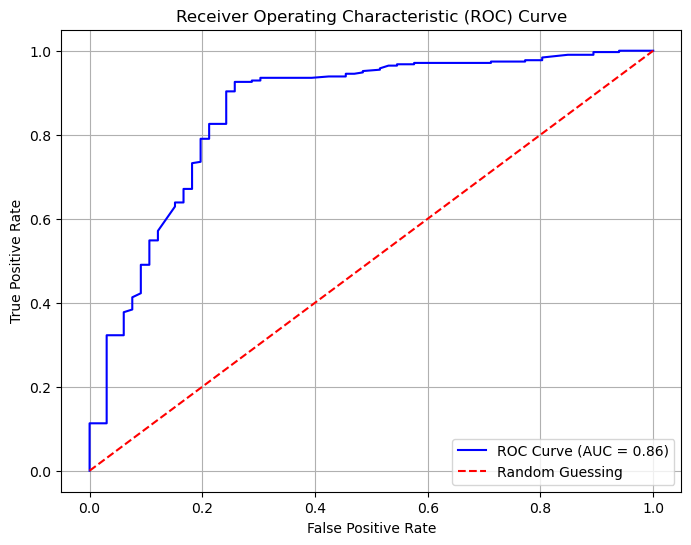

In [107]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_feedback, feedback_results.predict(X_feedback))

# Calculate AUC score
auc = roc_auc_score(y_feedback, feedback_results.predict(X_feedback))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc), color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Finally, we plot the ROC curve of the model against the AUC curve.

#### Output Model

In [110]:
# GLM for Output
X_feedback = online_foods_reg.drop(['Output'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      364
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.33
Date:                Sat, 27 Jul 2024   Deviance:                       256.65
Time:                        22:11:01   Pearson chi2:                     402.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3020
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Now, we model the dependent variable **Output**. We model it in the same way as we did for **Feedback**. We get an initial accuracy score of **87.5%** with a precision score of **89.2%**. This model is already significantly better than the model we built in project 1, which had an accuracy of **16%** and a precision of **40%**.
- We continue to improve this model.

In [112]:
X_feedback = online_foods_reg.drop(['Output', 'longitude'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      365
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.33
Date:                Sat, 27 Jul 2024   Deviance:                       256.65
Time:                        22:11:01   Pearson chi2:                     402.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3020
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [113]:
X_feedback = online_foods_reg.drop(['Output', 'longitude', 'Family size'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      366
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.34
Date:                Sat, 27 Jul 2024   Deviance:                       256.68
Time:                        22:11:01   Pearson chi2:                     401.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3019
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [114]:
X_feedback = online_foods_reg.drop(['Output', 'longitude', 'Family size', 'Monthly Income'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      367
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.35
Date:                Sat, 27 Jul 2024   Deviance:                       256.71
Time:                        22:11:01   Pearson chi2:                     401.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3019
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [115]:
X_feedback = online_foods_reg.drop(['Output', 'longitude', 'Family size', 'Monthly Income', 'Educational Qualifications'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      368
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.39
Date:                Sat, 27 Jul 2024   Deviance:                       256.78
Time:                        22:11:01   Pearson chi2:                     400.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3017
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1246.4997   3032.205      0.

In [116]:
# FINAL MODEL: OUTPUT
X_feedback = online_foods_reg.drop(['Output', 'longitude', 'Family size', 'Monthly Income', 'Educational Qualifications',
                                   'Pin code', 'Age', 'Gender'], axis=1)  # Predictors
y_feedback = online_foods_reg['Output']  # Dependent variable

# Add constant term to predictors
X_feedback = sm.add_constant(X_feedback)

# Fit GLM for Feedback
feedback_model = sm.GLM(y_feedback, X_feedback, family=sm.families.Binomial())
feedback_results = feedback_model.fit()

# Summary of Feedback model
print(feedback_results.summary())

# Predictions on the entire dataset for Feedback
feedback_predictions = feedback_results.predict(X_feedback)
feedback_predictions_class = np.where(feedback_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_feedback, feedback_predictions_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_feedback, feedback_predictions_class)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_feedback, feedback_predictions_class)
print("Recall (Sensitivity):", recall)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Output   No. Observations:                  376
Model:                            GLM   Df Residuals:                      371
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -129.52
Date:                Sat, 27 Jul 2024   Deviance:                       259.04
Time:                        22:11:01   Pearson chi2:                     416.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2976
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            110.2904     46.997      2.

- We achieve a peak model accuracy of **88%** with a precision of **90%** and a recall score of **95.6%**.
- Even though the model above this has a little higher accuracy and recall score, the model's y-intercept has a p-value of **0.681**. This is above the target p-value we set of **0.05**. Even though we cannot directly conduct a hypothesis test on the intercept and remove it, we can remove other predictors with high p-values.
- In doing so, we get a lower criitcal value for the intercept of the model, thus making the model more linear.

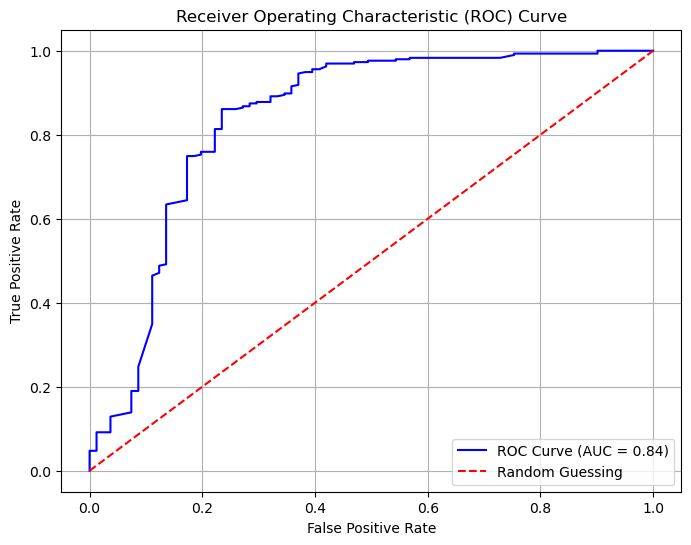

In [118]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_feedback, feedback_results.predict(X_feedback))

# Calculate AUC score
auc = roc_auc_score(y_feedback, feedback_results.predict(X_feedback))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc), color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Data Visualization

### Customer Base By Occupation

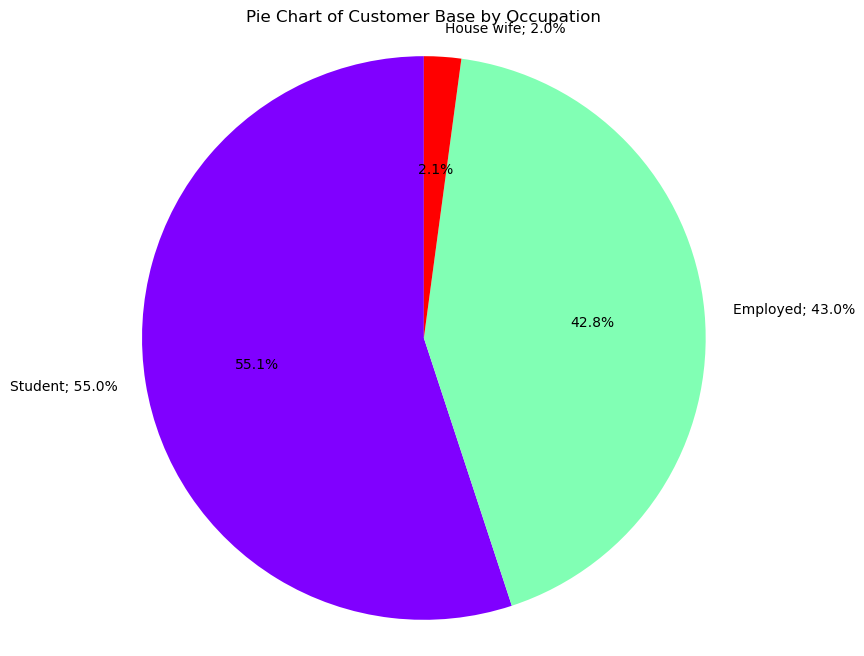

In [120]:
# Calculate frequencies of each occupation
occupation_freq = online_foods['Occupation'].value_counts()

# Convert frequencies to a data frame
occupation_df = pd.DataFrame({'Occupation': occupation_freq.index, 'Frequency': occupation_freq.values})

# Calculate percentages
pct = (occupation_df['Frequency'] / occupation_df['Frequency'].sum() * 100).round()
lbls = [f"{occ}; {p}%" for occ, p in zip(occupation_df['Occupation'], pct)]

plt.figure(figsize=(8, 8))
plt.pie(occupation_df['Frequency'], labels=lbls, autopct='%1.1f%%', startangle=90, colors=plt.cm.rainbow(np.linspace(0, 1, len(lbls))))
plt.title("Pie Chart of Customer Base by Occupation")
plt.axis('equal')
plt.show()

- In this analysis, we utilize a three-dimensional pie chart to visually represent the distribution of the sample according to their occupations. 
- The findings reveal that a significant portion (**55%**) of the consumer base of the online food ordering app comprises students, while housewives constitute a much smaller proportion (**2%**). 
- Notably, housewives are distinctly categorized as an occupation group within this dataset, possibly indicating regional biases specific to Bengaluru, India.

### Distribution of Order Feedback Sentiment by Educational Qualification

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


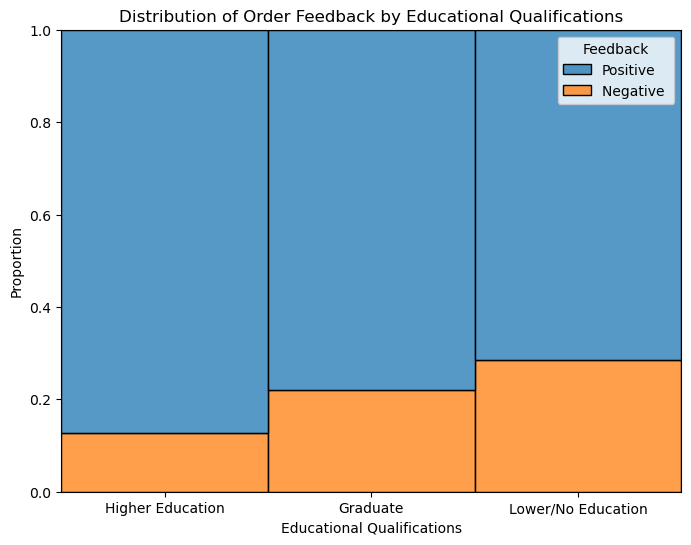

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(x="Educational Qualifications", hue="Feedback", data=online_foods, stat="probability", multiple="fill")
plt.title("Distribution of Order Feedback by Educational Qualifications")
plt.xlabel("Educational Qualifications")
plt.ylabel("Proportion")
plt.show()

- Individuals with higher educational qualifications demonstrate a propensity to provide positive feedback on their orders significantly more often compared to those with lower levels of education.

### Distribution of Order Output by Marital Status

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


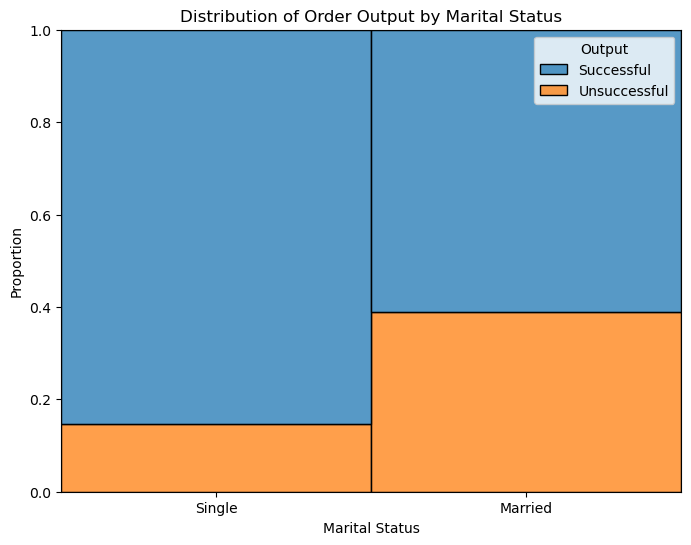

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(x="Marital Status", hue="Output", data=online_foods, stat="probability", multiple="fill")
plt.title("Distribution of Order Output by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.show()

- This barplot suggests that married individuals tend to encounter a notably higher proportion of unsuccessful orders compared to single individuals. This trend may correlate with the observation that students in Bengaluru tend to leave more positive reviews on orders. This connection likely stems from the fact that students, who are typically single, experience a higher proportion of successful order transactions. (**based on regional biases of India, assuming students are generally single**)

### Distribution of Order Output by Occupation

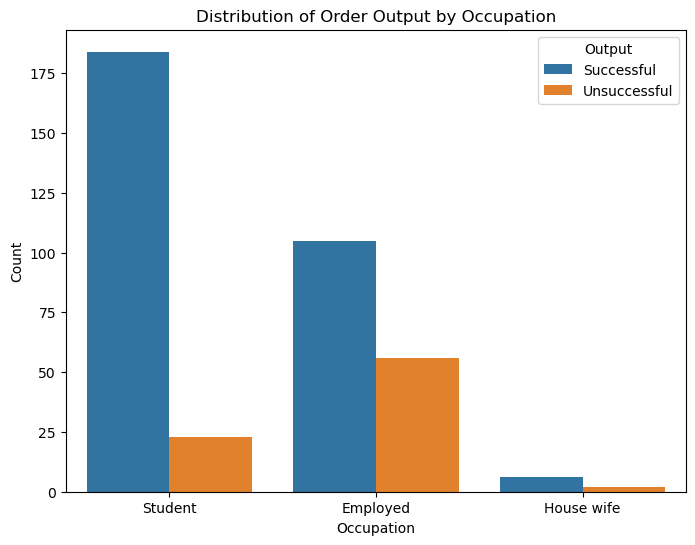

In [129]:
occupation_order = ['Student', 'Employed', 'House wife']

plt.figure(figsize=(8, 6))
sns.countplot(x="Occupation", hue="Output", data=online_foods, order=occupation_order)
plt.title("Distribution of Order Output by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Output")
plt.show()

- The bar plot indicates a significant disparity in successful order experiences among different demographic groups. Specifically, students receive a substantially higher number of successful orders from the online food ordering platform compared to housewives and employed individuals. Conversely, employed individuals exhibit the lowest proportion of successful order experiences relative to other groups.

## Conclusion

- Throughout this project, we've effectively performed data cleaning, analysis, and visualization to glean valuable insights into the ordering behaviors of Bengaluru, India residents on an online food ordering platform. By systematically refining the dataset, exploring its nuances through analytical techniques, and crafting insightful visualizations, we've uncovered significant patterns and trends shaping consumer preferences and habits in the local online food delivery landscape.

## Dataset link

- Kaggle link to dataset source:
[dataset](https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset/data)